In [1]:
import pandas as pd
import DataLoading
import torch
import matplotlib.pyplot as plt
import NN_evaluation
import numpy as np 

In [4]:
sc = "sc01"
period = "2030"
case= "RTS24"
folder = f"../Data/{case}_AC_12w_ext_o_dummy_LCOE/"

all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)
te_s = 0.3
val_s = 0.4
dfs_in, dfs_out, dfs_inter = DataLoading.load_data_ext_out(folder, all_executions, period, sc, ["PowerFlow"],"SystemCosts")
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter)
dfs_inter_j = DataLoading.trim_columns_to_common(dfs_inter_j)
# Convert to pytorch tensors
ts_in, ts_out, ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in, dfs_out, dfs_inter_j, all_executions, te_s, val_s)
d_ft_in, d_ft_out, d_ft_inter,maxs = DataLoading.concat_and_normalize_ext_out(ts_in, ts_out, ts_inter, all_executions)

input_size = dfs_in["Network_Existing_Generation_Full"].shape[1]
inter_size = dfs_inter_j["Network_Existing_Generation_Full"].shape[1]

input_f_sc01_Network_Existing_Generation_Full_2030.csv
79
input_f_sc01_Network_Line_In_N_101_N_102_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_101_N_103_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_101_N_105_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_102_N_106_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_103_N_109_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_103_N_124_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_105_N_110_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_106_N_108_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_107_N_108_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_108_N_109_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_108_N_110_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_109_N_111_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_109_N_112_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_110_N_111_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_111_N_114_cac1_2030.csv
79
input_f_sc01_Network_Line_In_N_112_N_123_cac1_2030.csv
79
input_f_sc01_N

In [7]:
#Calculate the average output deviation
ex = all_executions[2]

base_actual = NN_evaluation.get_actual_from_dfs_out(all_executions[0],dfs_out)
ex_actual = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)

percentage_dev = (base_actual/ex_actual - 1)*100
percentage_dev_2 = (base_actual - ex_actual)/np.mean(ex_actual)

lb = base_actual - ex_actual

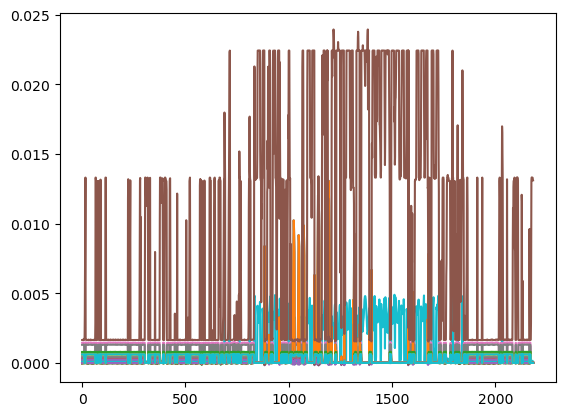

In [18]:
for ex in all_executions:
    #ex = all_executions[30]

    base_actual = NN_evaluation.get_actual_from_dfs_out(all_executions[0],dfs_out)
    ex_actual = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)

    lb = base_actual - ex_actual

    plt.plot(lb)
#plt.plot(base_actual)


In [4]:
np.std(base_actual)/np.mean(base_actual)

0.24391615273049894

In [5]:
np.median(percentage_dev),np.mean(percentage_dev)

(-1.3179154008997607, -1.9806507558536088)

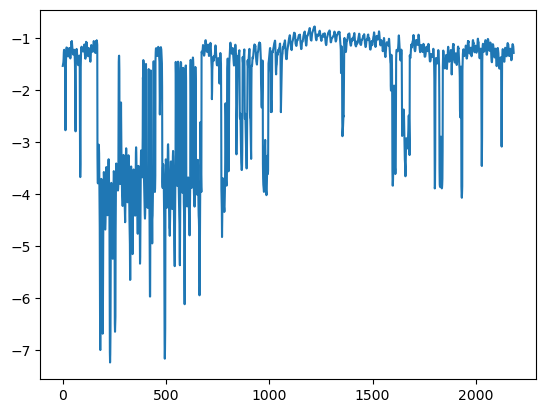

In [6]:
plt.plot(percentage_dev)

In [7]:
dfs_out

{'Network_Existing_Generation_Full':                            vTotalCCost  vTotalECost  vTotalGCost  vTotalRCost
 LoadLevel                                                                    
 2030-01-01T00:00:00+01:00          0.0          0.0     0.016447          0.0
 2030-01-01T01:00:00+01:00          0.0          0.0     0.016715          0.0
 2030-01-01T02:00:00+01:00          0.0          0.0     0.016938          0.0
 2030-01-01T03:00:00+01:00          0.0          0.0     0.017257          0.0
 2030-01-01T04:00:00+01:00          0.0          0.0     0.018526          0.0
 ...                                ...          ...          ...          ...
 2030-12-09T19:00:00+01:00          0.0          0.0     0.023676          0.0
 2030-12-09T20:00:00+01:00          0.0          0.0     0.023204          0.0
 2030-12-09T21:00:00+01:00          0.0          0.0     0.021947          0.0
 2030-12-09T22:00:00+01:00          0.0          0.0     0.020613          0.0
 2030-12-09T23:0